## Dice誤差の算出

### 検証

In [ ]:
!ls ../pix2pix-tensorflow-141/CT2edges_test/images

In [36]:
import glob
from natsort import natsorted

files = natsorted(glob.glob("../pix2pix-tensorflow-141/CT2edges_test/images/*outputs.png"))[:10]
files

['../pix2pix-tensorflow-141/CT2edges_test/images/S0-0-outputs.png',
 '../pix2pix-tensorflow-141/CT2edges_test/images/S0-1-outputs.png',
 '../pix2pix-tensorflow-141/CT2edges_test/images/S0-2-outputs.png',
 '../pix2pix-tensorflow-141/CT2edges_test/images/S0-3-outputs.png',
 '../pix2pix-tensorflow-141/CT2edges_test/images/S0-4-outputs.png',
 '../pix2pix-tensorflow-141/CT2edges_test/images/S0-5-outputs.png',
 '../pix2pix-tensorflow-141/CT2edges_test/images/S0-6-outputs.png',
 '../pix2pix-tensorflow-141/CT2edges_test/images/S0-7-outputs.png',
 '../pix2pix-tensorflow-141/CT2edges_test/images/S0-8-outputs.png',
 '../pix2pix-tensorflow-141/CT2edges_test/images/S0-9-outputs.png']

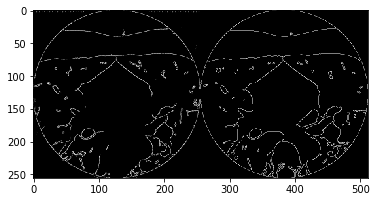

In [40]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


img_output = cv2.imread(files[0], cv2.IMREAD_GRAYSCALE)
img_target = cv2.imread(files[0].replace('outputs','targets'), cv2.IMREAD_GRAYSCALE)
img_results= cv2.hconcat([img_output,img_target])
plt.imshow(img_results)


In [46]:
import numpy as np

def Dice_loss(out, target):
    im1 = np.asarray(out).astype(np.bool)
    im2 = np.asarray(target).astype(np.bool)

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch at input 2 images")

    im_sum = im1.sum() + im2.sum()
    if im_sum == 0:
        return empty_score

    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)
    return  intersection.sum() * 2 / im_sum

Dice_loss(img_output,img_target)

0.602374464772285

### 指定ファイル全てのLoss検証

In [52]:
import pandas as pd

files  = natsorted(glob.glob("../pix2pix-tensorflow-141/CT2edges_test/images/*outputs.png"))
result = pd.DataFrame([], columns=['Name','DiceScore'])


for img in files:
    img_output = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    img_target = cv2.imread(img.replace('outputs','targets'), cv2.IMREAD_GRAYSCALE)
    Loss = Dice_loss(img_output,img_target)
    
    in_name  = img.split('/')[-1].split('-')
    out_name = '-'.join((in_name[0],in_name[1]))
    
    addRow = pd.DataFrame([out_name,Loss], index=result.columns).T
    result = result.append(addRow)
    


In [61]:
print(result['DiceScore'].describe())
print('平均', result['DiceScore'].mean())

count     1222.000000
unique    1220.000000
top          0.571429
freq         2.000000
Name: DiceScore, dtype: float64
平均 0.5839896952511445
